In [404]:
#10931
#10950

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [405]:
data=pd.read_csv("car_prediction.csv")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4173.0,19418.746935,25584.242620,600.0,6999.0,11500.0,21700.0,300000.00
Mileage,4345.0,161.237284,105.705797,0.0,86.0,155.0,230.0,980.00
EngineV,4195.0,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Year,4345.0,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.00


In [406]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [408]:
cleaned_data=data.dropna(subset='Price')

In [ ]:
data.select_dtypes(object).nunique()

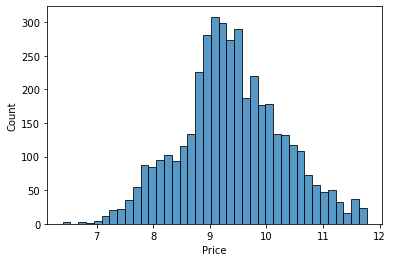

In [409]:
cleaned_data=cleaned_data[cleaned_data.Price<130000]
ax1=sns.histplot(np.log(cleaned_data.Price))



<AxesSubplot:xlabel='EngineV', ylabel='Count'>

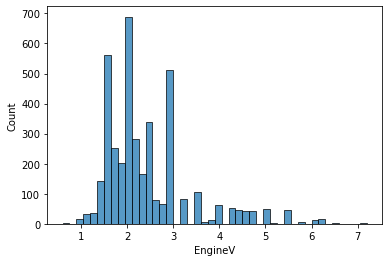

In [410]:
cleaned_data=cleaned_data[cleaned_data.EngineV<8]
sns.histplot(cleaned_data.EngineV)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

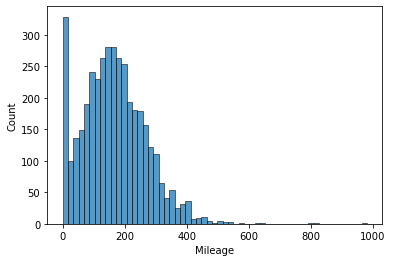

In [411]:
sns.histplot(cleaned_data.Mileage)

In [412]:
x=cleaned_data.drop('Price',axis=1)
y=cleaned_data.Price


In [413]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [414]:
numerical_data=x_train.select_dtypes(np.number).columns
catagorical_data=x_train.select_dtypes(object).columns


In [415]:
numerical_transformer=SimpleImputer(strategy='mean')
catagorical_transformer=Pipeline(steps=[ 
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onhot',OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [416]:
preprocessing=ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_data),
    ('cat',catagorical_transformer,catagorical_data)
])

In [417]:
model=RandomForestRegressor(n_estimators=10)

In [418]:
model1=XGBRegressor()

In [419]:
model2=DecisionTreeRegressor()

In [420]:
model3=GradientBoostingRegressor()

In [421]:
    my_pipline=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',model)
])
     

In [422]:
my_pipline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Mileage', 'EngineV', 'Year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], dtype='object'))])),
                ('model', RandomForestRegressor(n_estimators=10))])

In [423]:
pred=my_pipline.predict(x_test)

In [424]:
mean_absolute_error(y_test,pred)

2672.2086236019786

In [425]:
   my_pipline1=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',model1)
])

In [426]:
my_pipline1.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Mileage', 'EngineV', 'Year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], dtype='objec...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', impor

In [427]:
pred1=my_pipline1.predict(x_test)

In [428]:
mean_absolute_error(y_test,pred1)

2404.7055743946294

In [429]:
   my_pipline2=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',model2)
])

In [430]:
my_pipline2.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Mileage', 'EngineV', 'Year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [431]:
pred2=my_pipline2.predict(x_test)

In [432]:
mean_absolute_error(y_test,pred2)

3154.2465211307026

In [433]:
    my_pipline3=Pipeline(steps=[
    ('preprocessing',preprocessing),
    ('model',model3)
])

In [434]:
my_pipline3.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  Index(['Mileage', 'EngineV', 'Year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onhot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], dtype='object'))])),
                ('model', GradientBoostingRegressor())])

In [435]:
pred3=my_pipline3.predict(x_test)

In [436]:
mean_absolute_error(y_test,pred3)

3252.1147105189225